In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
df = pd.read_csv('country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#verificamos los valores nulos
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
#verificamos los duplicados
df.duplicated().sum()

np.int64(0)

#análisamos la distribución

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df_01 = df.drop('country', axis=1)

In [8]:
df_01.head(
)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


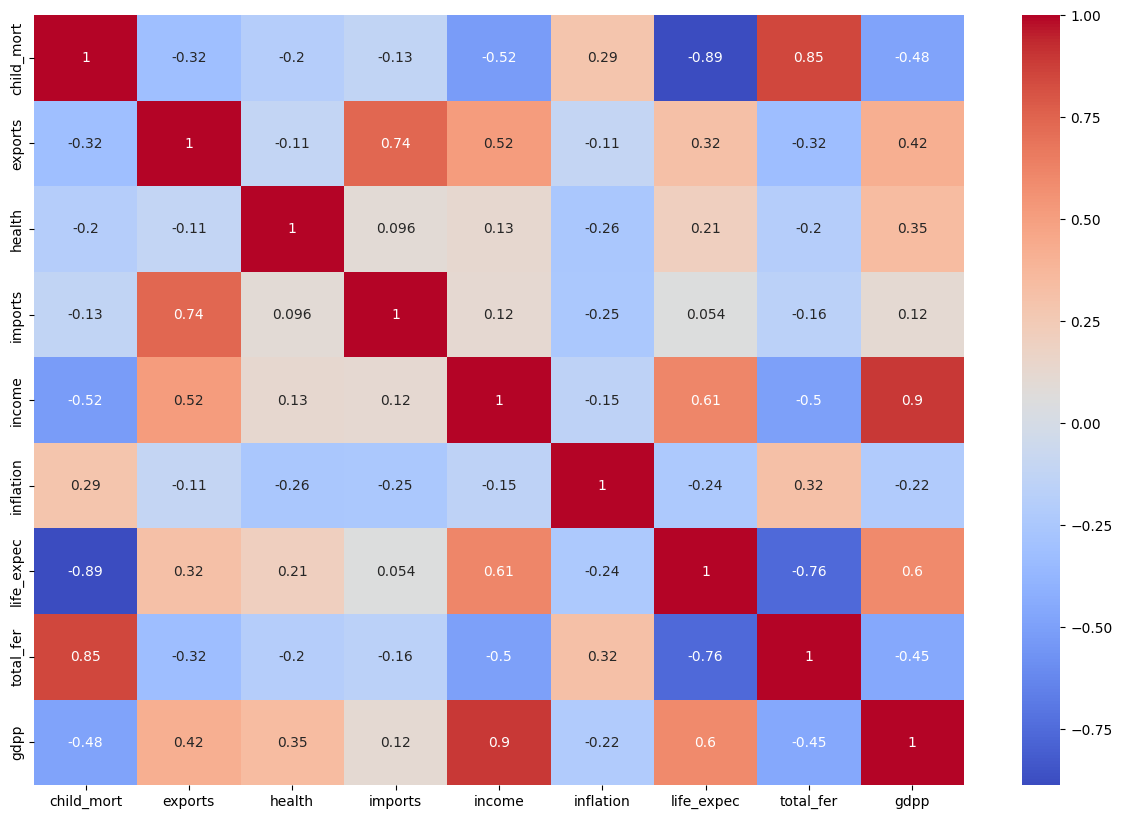

In [9]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(data=df_01.corr(), annot=True, cmap='coolwarm')
plt.show()

#escalamos los datos para poder trabajar de manera correcta

In [14]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_escaled = scaler.fit_transform(df_01)

In [15]:
df_escaled = pd.DataFrame(df_escaled, columns=df_01.columns)
df_escaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


PCA para mejorar la escabilidad de los datos

In [16]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()
pca.fit(df_escaled)
df_pca = pca.transform(df_escaled)

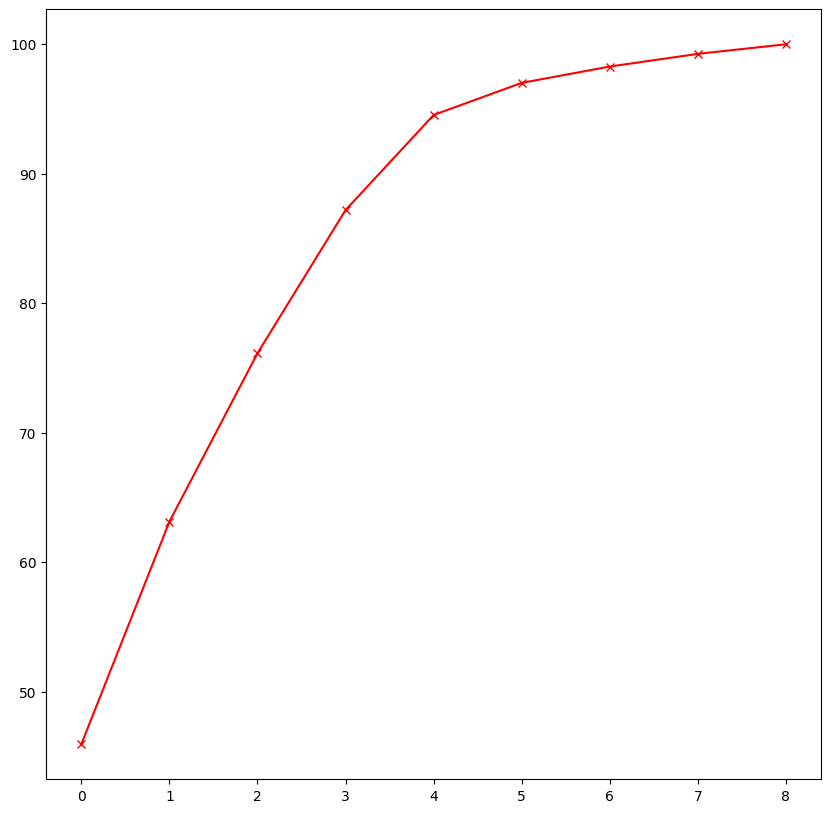

In [20]:
#analizamos cuantas variabels necesitamos
var = pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [114]:
df_std = pd.DataFrame(df_pca)
df_std.drop([4,5,6,7,8], axis=1, inplace=True)

In [115]:

df_std.head()

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


METODO K-MEANS

In [124]:
Sum_of_squared_distances = []
silhouette_scores = []
k = range(2,15)
for _ in k :
    km = KMeans(n_clusters= _)
    y = km.fit_predict(df_std)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_std,y))

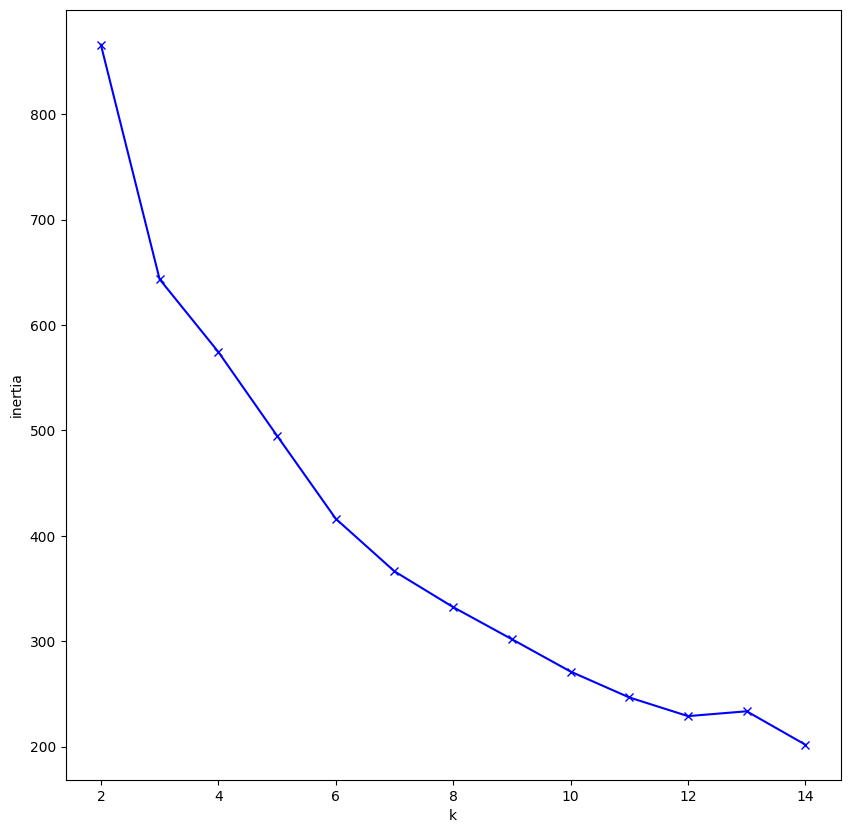

In [125]:
plt.figure(figsize=(10,10))
plt.plot(k, Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

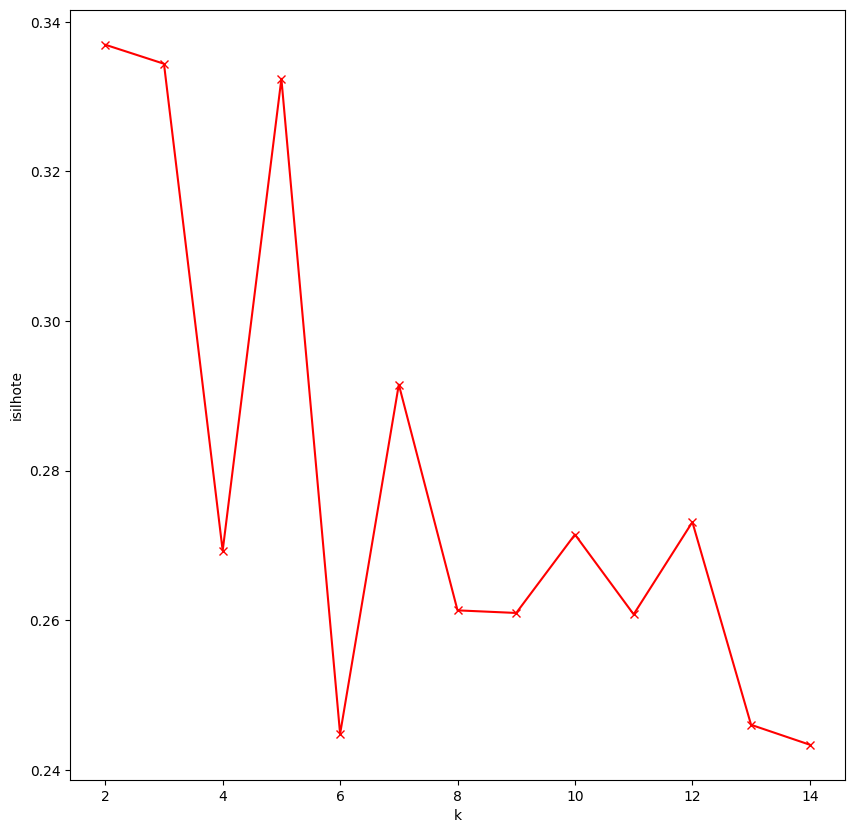

In [126]:
plt.figure(figsize=(10,10))
plt.plot(k, silhouette_scores,'rx-')
plt.xlabel('k')
plt.ylabel('isilhote')
plt.show()

In [127]:
print("notamos que necesitamos un valor de k=5")
km_01 = KMeans(n_clusters=5)
y_pred_01 = km_01.fit_predict(df_std)
print(silhouette_score(df_std,y_pred_01))
df['k_mean_pca']= y_pred_01

notamos que necesitamos un valor de k=5
0.27460647481932715


In [128]:
Sum_of_squared_distances = []
silhouette_scores = []
k = range(2,15)
for _ in k :
    km = KMeans(n_clusters= _)
    y = km.fit_predict(df_01)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_01,y))

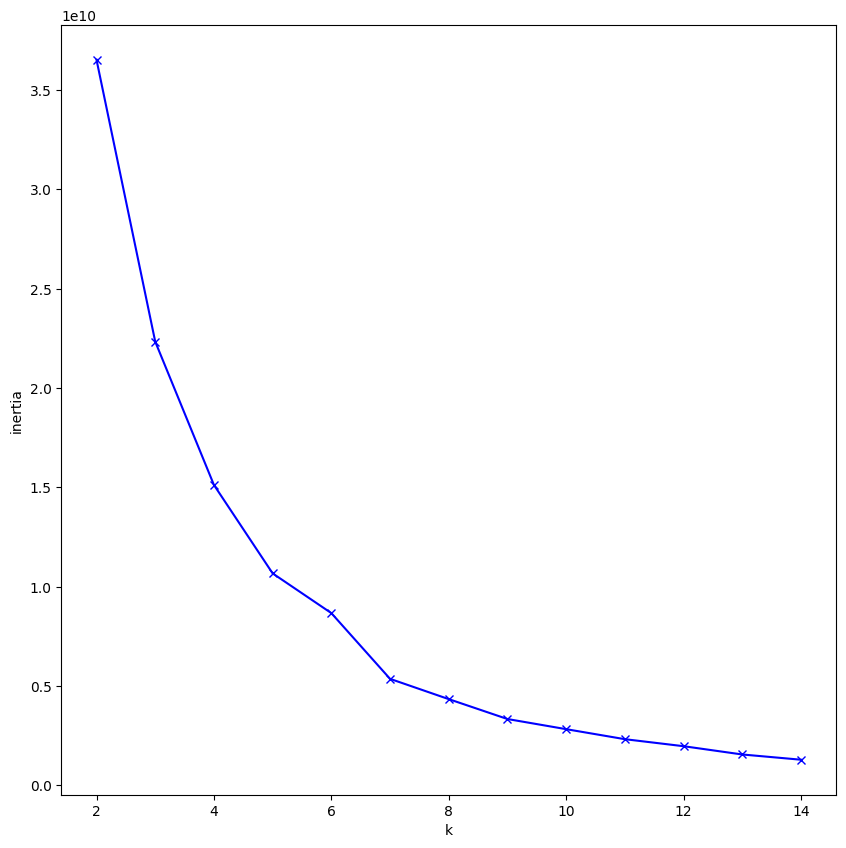

In [129]:
plt.figure(figsize=(10,10))
plt.plot(k, Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

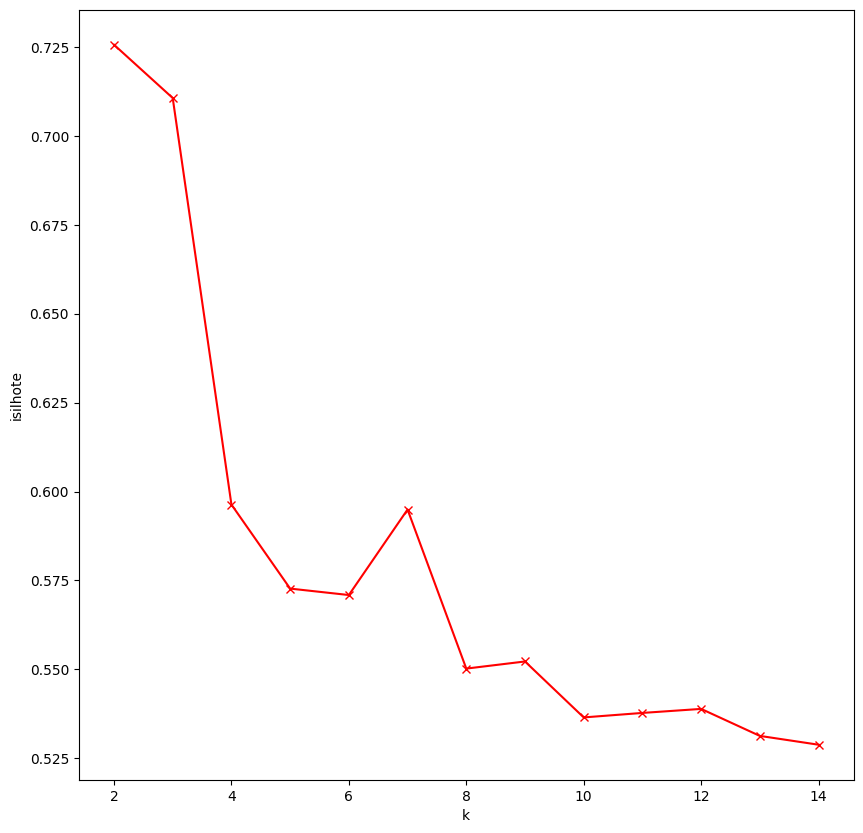

In [130]:
plt.figure(figsize=(10,10))
plt.plot(k, silhouette_scores,'rx-')
plt.xlabel('k')
plt.ylabel('isilhote')
plt.show()

In [131]:
print("notamos que necesitamos un valor de k=8")
km_original = KMeans(n_clusters=2)
y_pred_original = km_original.fit_predict(df_01)
print(silhouette_score(df_escaled,y_pred_original))
df['k_mean_original']= y_pred_original

notamos que necesitamos un valor de k=8
0.31407927029528454
